# Activation Function
- 데이터의 폭을 정의

In [2]:
import numpy as np
import matplotlib.pyplot as plt

> 계단(Step) 함수

In [1]:
def step(val):
    if(val >= 0):
        return 1
    return 0

In [19]:
a = 1, 12414, -191, 0, -3818
b = []
for i in a:
    b.append(step(i))
b
    

[1, 1, 0, 1, 0]

- 계단함수는 데이터가 1 아니면 0으로 변한다, 데이터의 손실이 일어날 가능성이 있어 딥러닝에서는 사용되지 않는 활성화함수. 아주 간단한 분류는 가능하겠지만~

In [22]:
def step_np(val):
    return np.array(x > 0, dtype=np.int)

<ipython-input-22-b22b2ab7735d>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


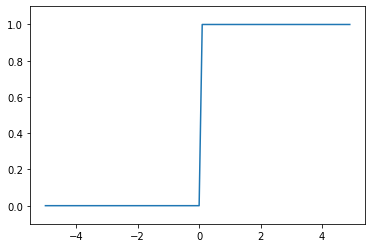

In [23]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_np(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

---
>시그모이드(Sigmoid) 함수

In [1]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

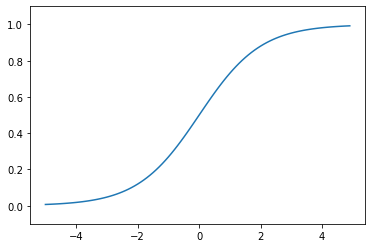

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

- 시그모이드 함수는 값을 0과 1 사이로 변환시킨다. 따라서 기울기가 사라지는 문제(Vanishing gradient problem)가 있음

---
>하이퍼볼릭탄젠트(Tanh) 함수

$$ sinhx = \frac{e^{x}-e^{-x}}{2} $$
$$ coshx = \frac{e^{x}+e^{-x}}{2} $$
$$ tanhx = \frac{sinhx}{coshx}=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} $$
$sinhx$ : 신치, 쌍곡 싸인, 하이퍼볼릭 싸인  
$coshx$ : 코시, 쌍곡 코싸인, 하이퍼볼릭 코싸인  
$tanhx$ : 텐치, 쌍곡 탄젠트, 하이퍼볼릭 탄젠트

In [6]:
def tanh(x):
    p_exp_x = np.exp(x)
    m_exp_x = np.exp(-x)
    y = (p_exp_x - m_exp_x) / (p_exp_x + m_exp_x)
    return y

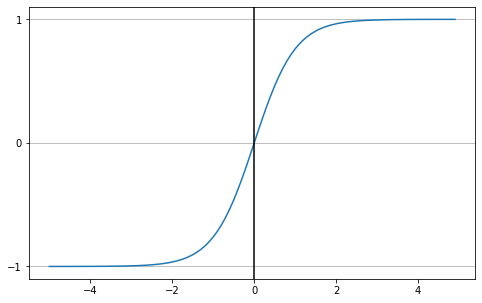

In [20]:
plt.figure(figsize=(8,5), facecolor='white')

plt.plot(x, y)
plt.yticks([-1.0, 0.0, 1.0])        # y축에 입력한 세 값만 나오도록
plt.gca().yaxis.grid(True)          # y축에 있는 모든 숫자에 회색 점선
plt.axvline(0.0, color='k')         # x=0에 직선
plt.show()

---
>렐루(ReLU, Rectified Linear Unit) 함수

$$ h(x) = \left\{\begin{array}{cc}
x\;(x>0) \\
0\;(x\leq0)
\end{array} \right. $$

In [21]:
def ReLU(x):
    return np.maximum(0, x)

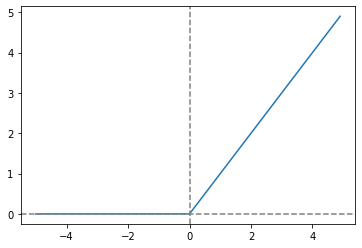

In [24]:
y = ReLU(x)

plt.plot(x, y)
plt.axvline(0.0, color='gray', linestyle='--')
plt.axhline(0.0, color='gray', linestyle='--')
plt.show()

- 신경망의 은닉층부분에서 가장 많이 사용

---
>Leaky ReLU(LReLU) 함수 : 음수 값들이 모두 0이 되는 렐루 함수의 한계를 해결하기 위해

In [25]:
def Leaky_ReLU(x):
    return np.maximum(0.01*x, x)

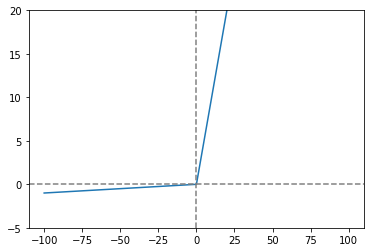

In [29]:
x = np.arange(-100., 100., 0.1)
y = Leaky_ReLU(x)

plt.plot(x, y)
plt.ylim(-5, 20)
plt.axvline(0., color='gray', linestyle='--')
plt.axhline(0., color='gray', linestyle='--')
plt.show()

- 음수에 0.01을 곱하여 Dying ReLU를 막고자 함
- 음수에서 선형성이 생겨 복잡한 분류에서 사용할 수 없다는 한계

> 그 외 PReLU, ELU, SELU 등